<h3>Лабораторна робота №6. ФБ-31 Шваюк Олександра</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

print("Setup ok")

Setup ok


Завдання 1:
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу
результатів.
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).
4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

Параметри справжньої прямої: k = -1 , b = 0
+---------------------------+-----------------------+---------------------+
|           Метод           | m (коефіцієнт нахилу) |   c (вільний член)  |
+---------------------------+-----------------------+---------------------+
| Метод найменших квадратів |  -1.0237135370392065  | 0.17203869469770722 |
|    Оцінка за np.polyfit   |  -1.0237135370392063  |  0.1720386946977059 |
+---------------------------+-----------------------+---------------------+


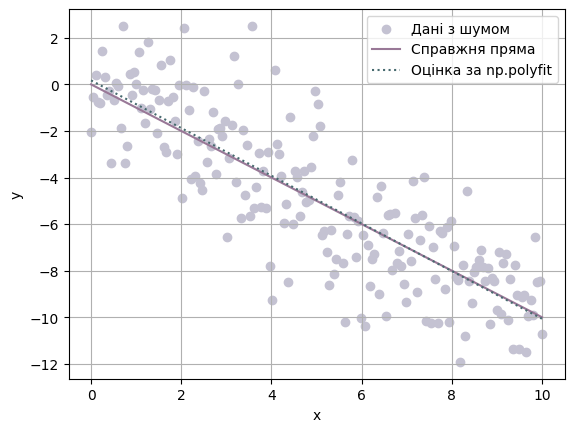

In [3]:
# Генерація даних
def generate_data(k, b, N, noise_std=2):
    x = np.linspace(0, 10, N)
    noise = np.random.normal(0, noise_std, N)
    y = k * x + b + noise
    return x, y

# Метод найменших квадратів 
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    kk_hat = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb_hat = (sum_y - kk_hat * sum_x) / n
    
    return kk_hat, bb_hat

# Візуалізація результатів
def plot_results(x, y, k, b, m_ls, c_ls, m_polyfit, c_polyfit):
    plt.scatter(x, y, color='#c4c2d2', label="Дані з шумом")  
    plt.plot(x, k * x + b, color='#997897', label="Справжня пряма")  
    plt.plot(x, m_polyfit * x + c_polyfit, color='#476a6f', linestyle=':', label="Оцінка за np.polyfit") 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Виведення таблиці з результатами
def print_results_table(m_ls, c_ls, m_polyfit, c_polyfit):
    table = PrettyTable()
    table.field_names = ["Метод", "m (коефіцієнт нахилу)", "c (вільний член)"]
    table.add_row(["Метод найменших квадратів", m_ls, c_ls])
    table.add_row(["Оцінка за np.polyfit", m_polyfit, c_polyfit])
    print(table)

def task_1():
    k = -1
    b = 0
    N = 200
    
    x, y = generate_data(k, b, N)
    m_ls, c_ls = least_squares_method(x, y)

    m_polyfit, c_polyfit = np.polyfit(x, y, 1)
    
    print("Параметри справжньої прямої: k =", k, ", b =", b)
    print_results_table(m_ls, c_ls, m_polyfit, c_polyfit)  
    
    plot_results(x, y, k, b, m_ls, c_ls, m_polyfit, c_polyfit)

if __name__ == '__main__':
    task_1()


Завдання 2:
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
4. Порівняйте отримані результати з результатами попереднього завдання

Параметри справжньої прямої: k = -1 , b = 0
+-------------------+-----------------------+----------------------+
|       Метод       | m (коефіцієнт нахилу) |   c (вільний член)   |
+-------------------+-----------------------+----------------------+
| Градієнтний спуск |  -0.9684884350561367  | -0.02991299680130776 |
+-------------------+-----------------------+----------------------+


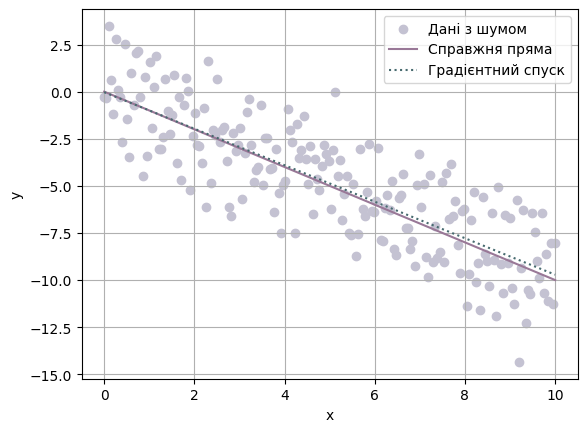

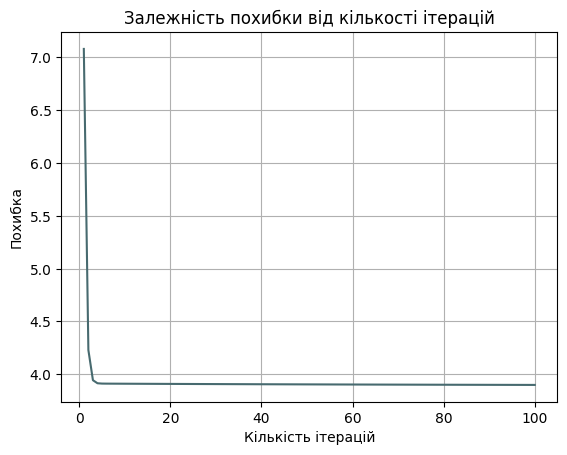

In [4]:
# Градієнтний спуск
def gradient_descent(x, y, learning_rate, n_iter):
    m, c = 0, 0 
    N = len(x)
    
    for _ in range(n_iter):
        y_pred = m * x + c
        m_gradient = -2 * np.sum(x * (y - y_pred)) / N
        c_gradient = -2 * np.sum(y - y_pred) / N
        
        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient
        
    return m, c

# Функція для обчислення середньоквадратичної помилки
def compute_error(x, y, m, c):
    y_pred = m * x + c
    return np.mean((y_pred - y) ** 2)

# Графік похибки від кількості ітерацій
def plot_error_iterations(x, y, learning_rate, max_iter):
    errors = []
    for i in range(1, max_iter + 1):
        m_gd, c_gd = gradient_descent(x, y, learning_rate, i)
        error = compute_error(x, y, m_gd, c_gd)
        errors.append(error)
    
    plt.plot(range(1, max_iter + 1), errors, color='#476a6f')
    plt.xlabel('Кількість ітерацій')
    plt.ylabel('Похибка')
    plt.title('Залежність похибки від кількості ітерацій')
    plt.grid(True)
    plt.show()

def task_2():
    k = -1
    b = 0
    N = 200
    
    x = np.linspace(0, 10, N)
    y = k * x + b + np.random.normal(0, 2, N)
    
    learning_rate = 0.01
    max_iter = 100
    
    m_gd, c_gd = gradient_descent(x, y, learning_rate, max_iter)
    
    print("Параметри справжньої прямої: k =", k, ", b =", b)
    table = PrettyTable()
    table.field_names = ["Метод", "m (коефіцієнт нахилу)", "c (вільний член)"]
    table.add_row(["Градієнтний спуск", m_gd, c_gd])
    print(table)
    
    plt.scatter(x, y, color='#c4c2d2', label="Дані з шумом")
    plt.plot(x, k * x + b, color='#997897', label="Справжня пряма")
    plt.plot(x, m_gd * x + c_gd, color='#476a6f', linestyle=':', label="Градієнтний спуск")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plot_error_iterations(x, y, learning_rate, max_iter)

# Виклик Завдання 2
if __name__ == '__main__':
    task_2()
